## Data Dictionary
### 3 **age**: 
age in years
### 4 **sex**: 
sex 1 = male; 0 = female      
### 9  **cp**: 
chest pain type
- Value 1: typical angina
- Value 2: atypical angina
- Value 3: non-anginal pain
- Value 4: asymptomatic       
### 10 **trestbps**: 
resting blood pressure in mm Hg on admission to the hospital
### 12 **chol**: 
serum cholestoral in mg/dl    
### 16 **fbs**: 
fasting blood sugar > 120 mg/dl  1 = true; 0 = false
### 19 **restecg**: 
resting electrocardiographic results
- Value 0: normal
- Value 1: having ST-T wave abnormality T wave inversions and/or ST elevation or depression of > 0.05 mV
- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria  
### 32 **thalach** 
maximum heart rate achieved 
### 38 **exang**: 
exercise induced angina 1 = yes; 0 = no  
### 40 **oldpeak**: 
ST depression induced by exercise relative to rest  
### 41 **slope** 
the slope of the peak exercise ST segment
- Value 1: upsloping
- Value 2: flat
- Value 3: downsloping   
### 44 **ca**: 
number of major vessels **0-3** colored by flourosopy      
### 51 **thal**: 
3 = normal; 6 = fixed defect; 7 = reversable defect  
### 58 **num**: 
diagnosis of heart disease **angiographic disease status**
- Value 0: < 50% diameter narrowing
- Value 1: > 50% diameter narrowing **in any major vessel: attributes 59 through 68 are vessels**

In [70]:
# Imports
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import Normalizer


In [2]:


columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

data1 = pd.read_csv("data/heart+disease/processed.cleveland.data", delimiter=",", header=None, names=columns)
data1['dataset'] = 1
data2 = pd.read_csv("data/heart+disease/processed.switzerland.data", delimiter=",", header=None, names=columns)
data2['dataset'] = 2
data3 = pd.read_csv("data/heart+disease/processed.va.data", delimiter=",", header=None, names=columns)
data3['dataset'] = 3
data4 = pd.read_csv("data/heart+disease/processed.hungarian.data", delimiter=",", header=None, names=columns)
data4['dataset'] = 4

# Concatenating DataFrames
hc_dataset = pd.concat([data1, data2, data3, data4], ignore_index=True)
hc_dataset.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,dataset
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,1
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,1
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,1


In [34]:
hc_dataset.shape

(920, 15)

In [75]:
hc_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 919 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       919 non-null    float64
 1   sex       919 non-null    int64  
 2   cp        919 non-null    int64  
 3   trestbps  919 non-null    float64
 4   chol      919 non-null    float64
 5   fbs       919 non-null    int64  
 6   restecg   919 non-null    int64  
 7   thalach   919 non-null    float64
 8   exang     919 non-null    int64  
 9   oldpeak   919 non-null    float64
 10  slope     919 non-null    int64  
 11  ca        919 non-null    int64  
 12  thal      919 non-null    int64  
 13  num       919 non-null    int64  
 14  dataset   919 non-null    int64  
dtypes: float64(5), int64(10)
memory usage: 114.9 KB


In [3]:
# Looking at missing values
hc_dataset.replace('?', np.nan, inplace=True)

hc_dataset.isnull().sum()

age           0
sex           0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalach      55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dataset       0
dtype: int64

## EDA

In [18]:
hc_dataset = hc_dataset.apply(pd.to_numeric, errors="coerce")
hc_dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,dataset
count,920.000000,920.000000,920.000000,861.000000,890.000000,830.000000,918.000000,865.000000,865.000000,858.000000,611.000000,309.000000,434.000000,920.000000,920.000000
mean,53.510870,0.789130,3.250000,132.132404,199.130337,0.166265,0.604575,137.545665,0.389595,0.878788,1.770867,0.676375,5.087558,0.995652,2.527174
std,9.424685,0.408148,0.930969,19.066070,110.780810,0.372543,0.805827,25.926276,0.487941,1.091226,0.619256,0.935653,1.919075,1.142693,1.244496
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,1.000000,0.000000,3.000000,0.000000,1.000000
25%,47.000000,1.000000,3.000000,120.000000,175.000000,0.000000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,1.000000
50%,54.000000,1.000000,4.000000,130.000000,223.000000,0.000000,0.000000,140.000000,0.000000,0.500000,2.000000,0.000000,6.000000,1.000000,3.000000
75%,60.000000,1.000000,4.000000,140.000000,268.000000,0.000000,1.000000,157.000000,1.000000,1.500000,2.000000,1.000000,7.000000,2.000000,4.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000,4.000000


In [17]:
# Check for outlier

hc_dataset.dtypes

age         float64
sex         float64
cp          float64
trestbps     object
chol         object
fbs          object
restecg      object
thalach      object
exang        object
oldpeak      object
slope        object
ca           object
thal         object
num           int64
dataset       int64
dtype: object

In [4]:
fig = px.pie(hc_dataset, names='sex', color='sex')
fig.show()

In [8]:
temp = hc_dataset.groupby(["dataset", "sex"])['cp'].count().reset_index()
fig = px.sunburst(hc_dataset, path=["dataset", "sex"], values="cp", title="Country vs Sex Distribution")
fig.show()

In [19]:
fig = px.histogram(data_frame=hc_dataset, x='cp', color='sex')
fig.show()

<Axes: xlabel='trestbps', ylabel='Count'>

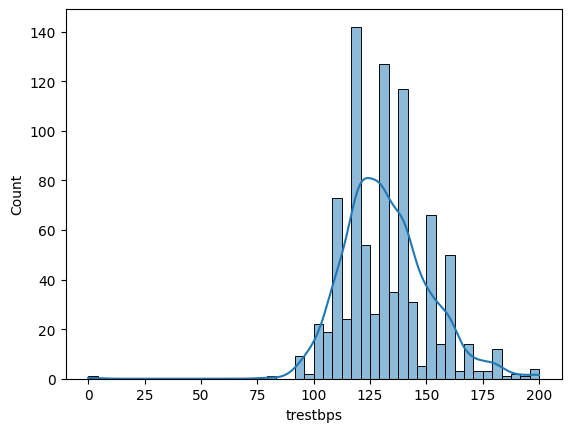

In [20]:
sns.histplot(hc_dataset['trestbps'], kde=True)

<Axes: ylabel='chol'>

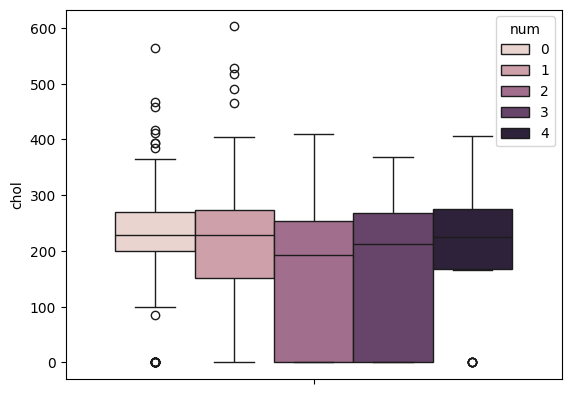

In [21]:
sns.boxplot(y=hc_dataset['chol'], hue=hc_dataset['num'])

In [23]:
temp = hc_dataset.groupby(['thal', 'sex'])['cp'].count().reset_index()
fig = px.bar(temp, x="thal", y="cp", color="sex", barmode="group")

# Show the plot
fig.show()

## Handling Missing Value
- Ensures Data Integrity & Accuracy
- Prevents Model Performance Issues
- Avoids Data Loss Due to Row Deletion
- Enhances Model Interpretability

In [27]:
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'num']
num_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [29]:
def imputer(data):

    knn_imputer = KNNImputer(n_neighbors=3)
    data[num_cols] = knn_imputer.fit_transform(data[num_cols])

    for col in cat_cols:
        missing_mask = data[col].isnull()

        if missing_mask.any():
            data_non_missing = data[~missing_mask]
            data_missing = data[missing_mask]


            X_train = data_non_missing.drop(columns=[col])
            y_train = data_non_missing[col]
            X_test = data_missing.drop(columns=[col])

            rf = RandomForestClassifier(n_estimators=100, random_state=42)
            rf.fit(X_train, y_train)

            data.loc[missing_mask, col] = rf.predict(X_test)

    data[cat_cols] = data[cat_cols].astype(int)

    return data


In [30]:
hc_dataset = imputer(hc_dataset)
hc_dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dataset     0
dtype: int64

## Handling Outliers

In [36]:
for col in num_cols:
    fig = px.box(hc_dataset, y=col, title=f"Box Plot for {col}")
    fig.show()

In [37]:
# Looking at the outlier for the column trestbps
hc_dataset[hc_dataset['trestbps'] == 0]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,dataset
459,55.0,1,3,0.0,0.0,0,0,155.0,0,1.5,2,1,7,3,3


In [38]:
hc_dataset = hc_dataset[hc_dataset['trestbps']!= 0]

### Target Processing

In [50]:
# prepare target columns
hc_dataset['num'] = np.where(hc_dataset['num']>0, 1, 0)

In [51]:
fig = px.pie(hc_dataset, names='num', color='num')
fig.show()

## Model Building

In [59]:

# Split Data
def train_data(data, target):
    X = data.drop(target, axis=1)
    y = data[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    # Initialize Models
    models = {
        "Logistic Regression": LogisticRegression(),
        "Random Forest with Imbalance": RandomForestClassifier(n_estimators=100, class_weight='balanced',random_state=42),
        "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    }

    # Train & Evaluate Each Model
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_train = model.predict(X_train)

        training_accuracy = accuracy_score(y_train, y_pred_train)


        print(f"\n{name} Performance:")
        print("Test Accuracy:", accuracy_score(y_test, y_pred))
        print(f"Training Accuracy: {training_accuracy}")

        print("Classification Report:\n", classification_report(y_test, y_pred))
        print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

### Using Cleaveland data

In [61]:
# cleaveland data
cleveland_data = hc_dataset[hc_dataset['dataset']==1]
train_data(cleveland_data, 'num')


Logistic Regression Performance:
Test Accuracy: 0.8241758241758241
Training Accuracy: 0.8679245283018868
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.91      0.84        47
           1       0.89      0.73      0.80        44

    accuracy                           0.82        91
   macro avg       0.84      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91

Confusion Matrix:
 [[43  4]
 [12 32]]

Random Forest with Imbalance Performance:
Test Accuracy: 0.7802197802197802
Training Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.87      0.80        47
           1       0.83      0.68      0.75        44

    accuracy                           0.78        91
   macro avg       0.79      0.78      0.78        91
weighted avg       0.79      0.78      0.78        91

Confusion Matrix:
 [[41  6]
 [14 30]]

Random Forest P

/opt/miniconda3/envs/jpm-env/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



### Using overall data

In [60]:
train_data(hc_dataset, 'num')


Logistic Regression Performance:
Test Accuracy: 0.8405797101449275
Training Accuracy: 0.8475894245723172
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81       116
           1       0.86      0.86      0.86       160

    accuracy                           0.84       276
   macro avg       0.84      0.84      0.84       276
weighted avg       0.84      0.84      0.84       276

Confusion Matrix:
 [[ 94  22]
 [ 22 138]]

Random Forest with Imbalance Performance:
Test Accuracy: 0.8586956521739131
Training Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.80      0.83       116
           1       0.86      0.90      0.88       160

    accuracy                           0.86       276
   macro avg       0.86      0.85      0.85       276
weighted avg       0.86      0.86      0.86       276

Confusion Matrix:
 [[ 93  23]
 [ 16 144]]

Random 

/opt/miniconda3/envs/jpm-env/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



### Grid Search for best parameter

In [56]:
rf_model = RandomForestClassifier(random_state=0, class_weight='balanced')
X = hc_dataset.drop('num', axis=1)
y = hc_dataset['num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_rf_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print('Best Hyperparameters:')
print(best_params)

best_rf_model.fit(X_train, y_train)

y_pred = best_rf_model.predict(X_test)
y_pred_train = best_rf_model.predict(X_train)

training_accuracy = accuracy_score(y_train, y_pred_train)


print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(f"Training Accuracy: {training_accuracy}")

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Best Hyperparameters:
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Test Accuracy: 0.8623188405797102
Training Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.78      0.83       116
           1       0.85      0.92      0.89       160

    accuracy                           0.86       276
   macro avg       0.86      0.85      0.86       276
weighted avg       0.86      0.86      0.86       276

Confusion Matrix:
 [[ 91  25]
 [ 13 147]]


### Reduce overfitiing

In [74]:
# Using best hyperparameter and applying L2 norm for overfitting problem
normalizer = Normalizer(norm='l2')
X_normalized = normalizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=42, stratify=y)

rf_model = RandomForestClassifier(max_depth= 10, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 100)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
y_pred_train = rf_model.predict(X_train)

training_accuracy = accuracy_score(y_train, y_pred_train)


print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(f"Training Accuracy: {training_accuracy}")

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Test Accuracy: 0.8804347826086957
Training Accuracy: 0.9968895800933126
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.85      0.86       123
           1       0.88      0.91      0.89       153

    accuracy                           0.88       276
   macro avg       0.88      0.88      0.88       276
weighted avg       0.88      0.88      0.88       276

Confusion Matrix:
 [[104  19]
 [ 14 139]]


### Cross validation to check the results

In [68]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=cv, scoring='accuracy')

print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

Cross-Validation Accuracy Scores: [0.87692308 0.84615385 0.89230769 0.890625   0.875      0.875
 0.828125   0.828125   0.84375    0.859375  ]
Mean CV Accuracy: 0.8615384615384615
